<a href="https://colab.research.google.com/github/KESHAVBERG/Linear_regression/blob/main/LeanearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

website Referred: https://mubaris.com/posts/linear-regression/

In this model we will have a input variable(x) and an output(y). we have to build a linear relation between these two varialbes. 

x: independent variable
y: dependent variable

linear relation is as follows:

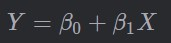

β1: scale factor

β0: bias factor

β0 gives some extra degree of freedom. Linear relation is as same as a simple line equation:

 y = mx + c, m=β1 and c= β0 

These co-efficients can be learnt by different methods such as  **Least Square Method and Gradient Descent Method**



**Least Square Method**

we appeoximate the relation between x and y to a line. 


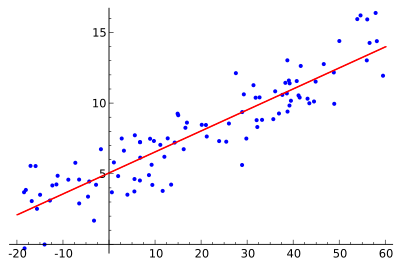

we are going to approximate the line and we wand to minimize the error. The error of each point is the distance between the point and the line. 

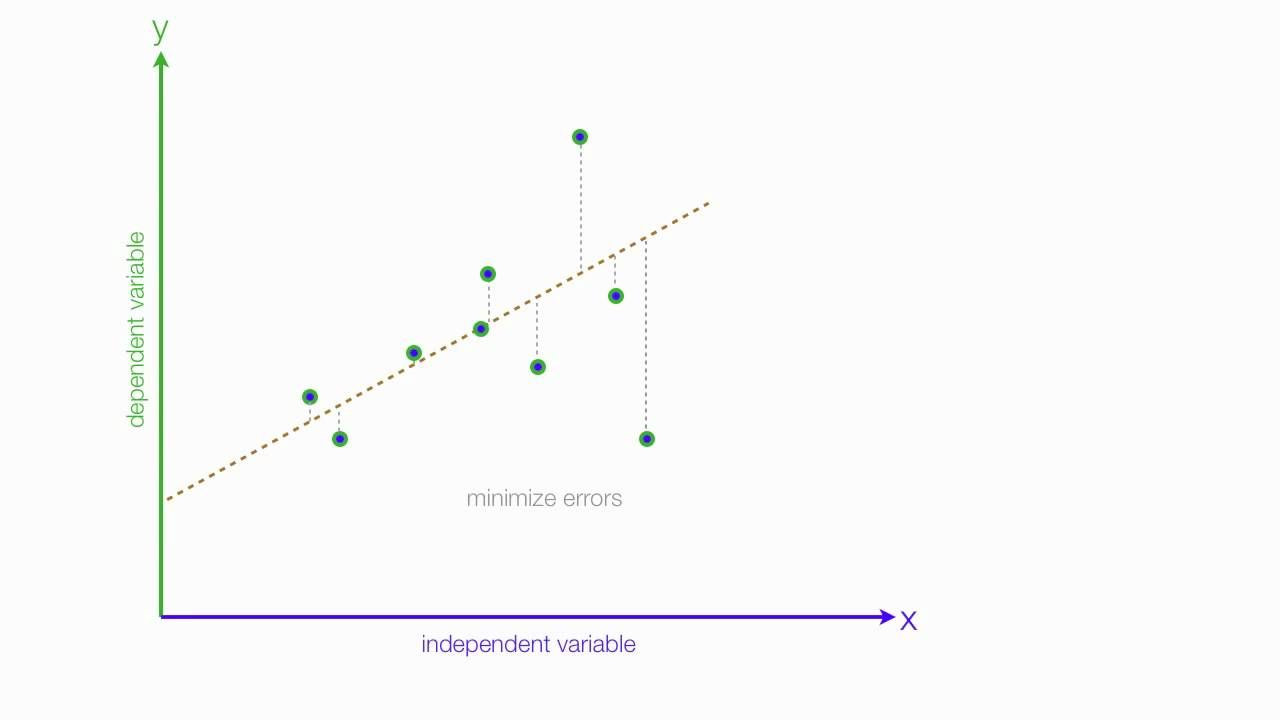


Total Error(D):

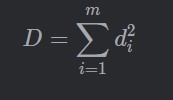

di: distance between line and the ith point

m: total No. of points 

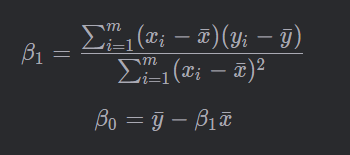

xdash.png: mean of x

ydash.png: mean of y

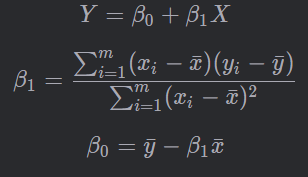


**Imports**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [181]:
data = pd.read_csv("headbrain.csv")

In [182]:
data.shape

(237, 4)

In [183]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [184]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
m = len(X)

In [185]:
numer = 0
denom = 0

In [186]:
for i in range(m):
  numer += (X[i] - mean_X)*(Y[i] - mean_Y)
  denom += (X[i] - mean_X)**2
beat1 = numer/denom
beat0 = mean_Y - beat1*mean_X

In [187]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

In [188]:
x = np.linspace(min_x,max_x,1000)
y = beat0+beat1*x

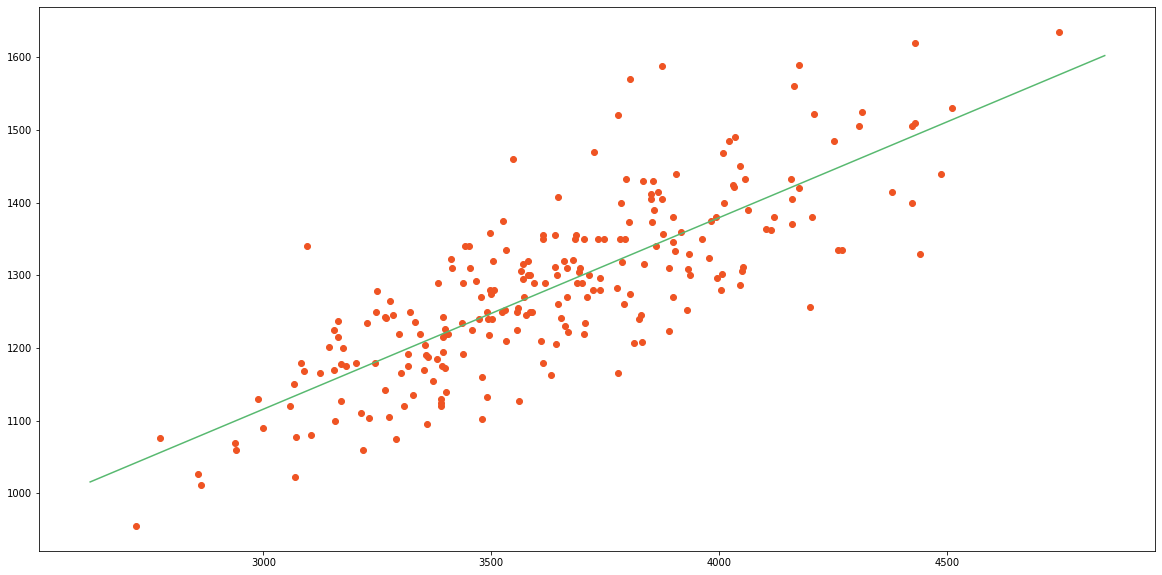

In [189]:
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

Root mean squared error:
      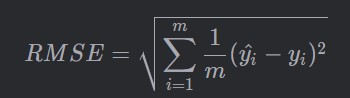

yhat.jpg: is the ith predicted output values.

In [190]:
rmseNu = 0

In [191]:
for i in range(m):
  yhat  = beat0 + beat1*X[i]
  rmseNu += (yhat - Y[i])**2


In [192]:
rmse = np.sqrt(rmseNu/m)

In [193]:
rmse

72.1206213783709

R^2 score < 0 then the model is wrong.

R^2 is computation is as follows:

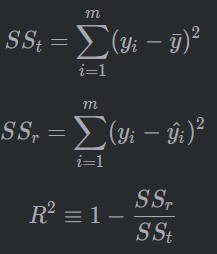

In [194]:
sst = 0
ssr = 0

In [195]:
for i in range(m):
  y_pred = beat0 + beat1*X[i]
  sst += (Y[i] - mean_Y)**2
  ssr += (Y[i] - y_pred)**2

In [196]:
rsquare = 1-(ssr/sst)

In [197]:
rsquare

0.6393117199570003

In [198]:
X = X.reshape((m,1))

In [199]:
reg = LinearRegression()

In [200]:
reg = reg.fit(X,Y)

In [201]:
yhat = reg.predict(X)

In [202]:
mse = mean_squared_error(Y,yhat)

In [203]:
remse = np.sqrt(mse)

In [204]:
remse

72.1206213783709

In [205]:
r2 = reg.score(X,Y)

In [206]:
r2

0.639311719957

##multiplie Linear Regression

X- input variable
Y- output variable


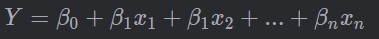

by putting x0 = 1, we can rewrite the equation as,

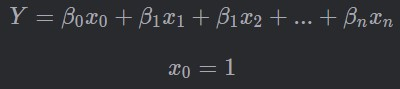


We convert it to matrix form:

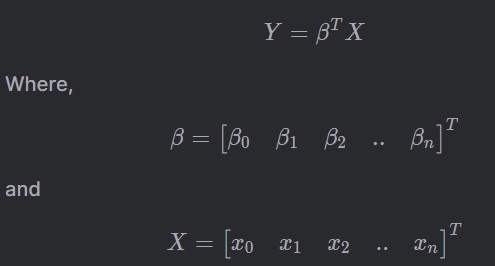



we define the cost of the model, the cost basically means the error of the model. Here Y is our approximation. Therefore, the hypothesis function is defined as:

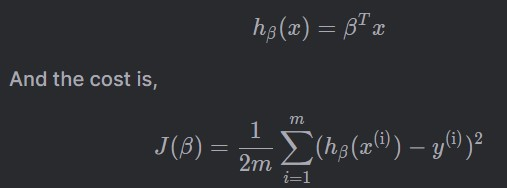

By minimizing this cost we can find beta. To do this achive this we going to use gradient decent.

#Gradient Desent

It is a optimization alogorithm. 

**step1:**
we will initalize the vallues of  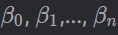 to some values, but in this we will set to zeros.

**setp2:**

iteratively updating,

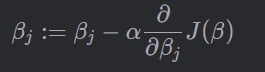

until it converges.

Here, alpha is the learning rate.

The operation 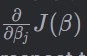 means we are finding the partial derivate of cost w.r.t each βj, is called gradient.

In step to we are changing the values of βj in hte direction in which we reduce the value of cost function. The gradient gives us the direction in which we have to move. Eventually, we will reach the mininum of the cost function. We need the learning rate because if we drastically change βj, we might miss the minima.

After applying math step 2 will be:

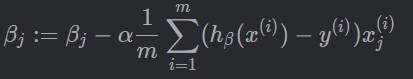

In [207]:
data = pd.read_csv('student.csv')

In [208]:
data.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [209]:
math = data['Math'].values
reading = data['Reading'].values
writing = data['Writing'].values

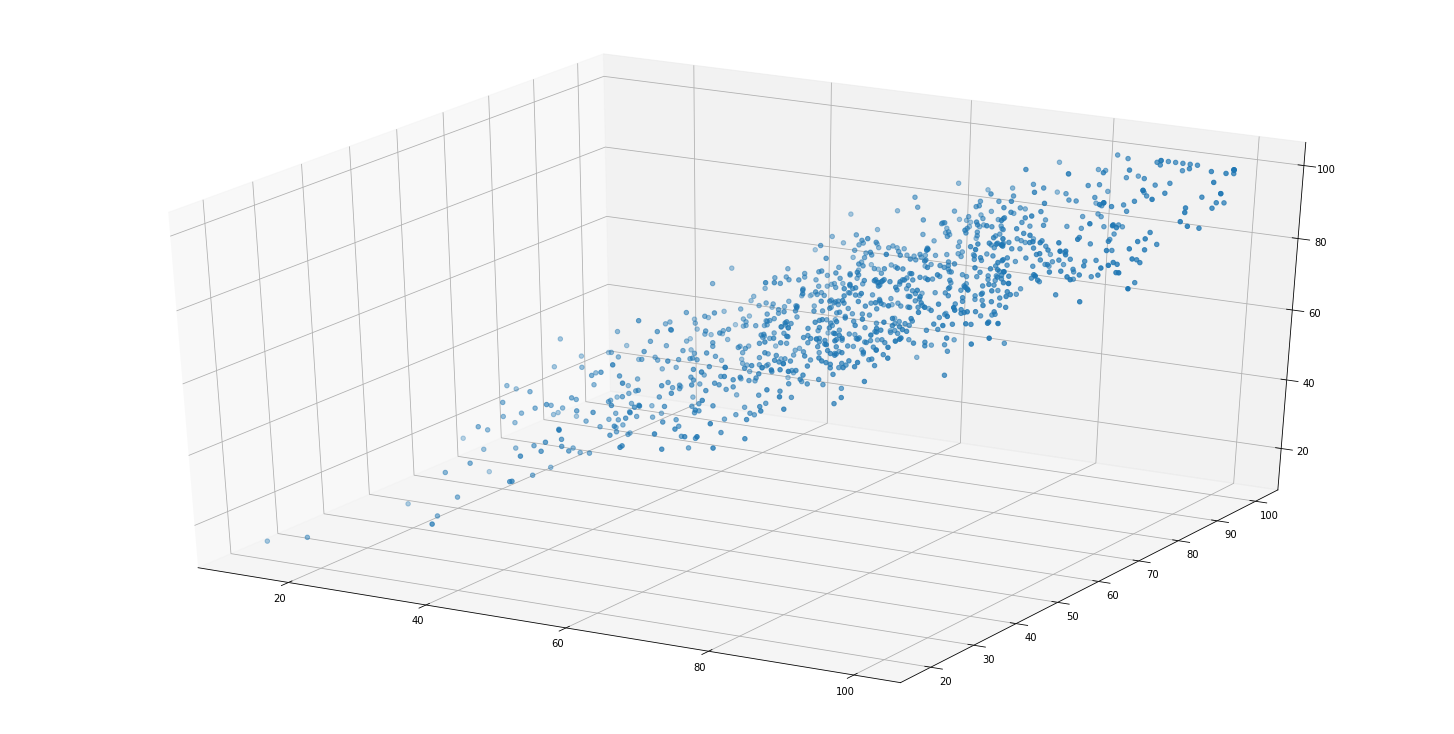

In [210]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math,reading,writing)

In [211]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0,math,reading]).T
B = np.array([0, 0, 0])
Y = np.array(writing)
LR = 0.001

In [212]:
B

array([0, 0, 0])

In [213]:
def cost_function(X, Y, B):
  m = len(Y)
  J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
  return J

In [214]:
inti_cost = cost_function(X,Y,B)

In [215]:
inti_cost

2470.11

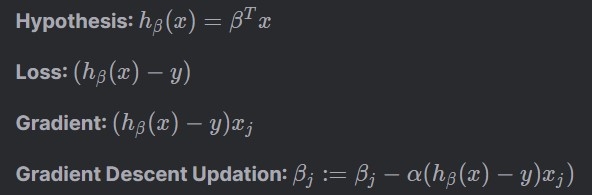

In [216]:
def gradient_descent(X, Y, B, alpha, iterations):

  m = len(Y)
  
  for iteration in range(iterations):
      h = X.dot(B)
      loss = h - Y
      gradient = X.T.dot(loss) / m
      B = B - alpha * gradient
  return B

In [217]:
Nb = gradient_descent(X,Y,B,LR,70)

In [218]:
Nb

array([-9.82102192e+63, -6.89814291e+65, -7.14369285e+65])